In [125]:
import pandas as pd
od_data = pd.read_csv('202205.csv', encoding='euc-kr', index_col=False)
print(od_data.head())

# Filter the data for the date range 20220501 to 20220531
filtered_data = od_data[(od_data['사용일자'] >= 20220501) & (od_data['사용일자'] <= 20220531)]

# Calculate the average of '승차총승객수' and '하차총승객수' for the filtered data
average = filtered_data[['승차총승객수','하차총승객수']].mean()

print(average)

# Group by '사용일자', '노선명', and '역명', then calculate the mean for each group
grouped_data = filtered_data.groupby(['역명'])[['승차총승객수', '하차총승객수']].mean().reset_index()

print(grouped_data)

# 승차역 별 총 승객 수 계산
total_board_counts = grouped_data[['역명','승차총승객수']]

# 하차역 별 총 승객 수 계산
total_alight_counts = grouped_data[['역명','하차총승객수']]

total_board_counts, total_alight_counts

       사용일자  노선명   역명  승차총승객수  하차총승객수      등록일자
0  20220101  3호선   수서    7370    7076  20220104
1  20220101  3호선  학여울     461     473  20220104
2  20220101  3호선   대청    3224    2903  20220104
3  20220101  3호선   일원    3321    2803  20220104
4  20220101  경원선   창동       1       0  20220104
승차총승객수    10997.577801
하차총승객수    10961.165117
dtype: float64
            역명        승차총승객수        하차총승객수
0     4.19민주묘지   3508.225806   3306.838710
1           가능   6736.419355   6385.838710
2         가락시장   7597.645161   7970.983871
3      가산디지털단지  25916.935484  27196.806452
4           가양  19591.516129  18846.258065
..         ...           ...           ...
520         회기  25512.806452  24690.838710
521         회룡  12556.483871  12403.322581
522  회현(남대문시장)  23463.645161  24775.000000
523      효창공원앞   4870.161290   4683.177419
524  흑석(중앙대입구)   8622.838710   8684.580645

[525 rows x 3 columns]


(            역명        승차총승객수
 0     4.19민주묘지   3508.225806
 1           가능   6736.419355
 2         가락시장   7597.645161
 3      가산디지털단지  25916.935484
 4           가양  19591.516129
 ..         ...           ...
 520         회기  25512.806452
 521         회룡  12556.483871
 522  회현(남대문시장)  23463.645161
 523      효창공원앞   4870.161290
 524  흑석(중앙대입구)   8622.838710
 
 [525 rows x 2 columns],
             역명        하차총승객수
 0     4.19민주묘지   3306.838710
 1           가능   6385.838710
 2         가락시장   7970.983871
 3      가산디지털단지  27196.806452
 4           가양  18846.258065
 ..         ...           ...
 520         회기  24690.838710
 521         회룡  12403.322581
 522  회현(남대문시장)  24775.000000
 523      효창공원앞   4683.177419
 524  흑석(중앙대입구)   8684.580645
 
 [525 rows x 2 columns])

In [126]:
t_data = pd.read_csv('혼잡도.csv', encoding='cp949')

import pandas as pd

def calculate_average(row):
    values = row[6:]  # 7번째 열부터 끝까지의 값 선택
    average = values.mean()
    return average



df = pd.DataFrame(t_data).groupby('출발역').sum().reset_index()

# 새로운 열 추가
df['Average'] = df.apply(calculate_average, axis=1)

print(df['Average'])

0      305.991892
1      192.183784
2      252.481081
3      221.186486
4      197.835135
          ...    
238    177.624324
239    124.272973
240     43.862162
241    186.637838
242    155.986486
Name: Average, Length: 243, dtype: float64


In [127]:
df1 = df[["출발역","Average"]]
df2 = total_board_counts
df3 = total_alight_counts

# 출발역을 기준으로 첫 번째와 두 번째 데이터프레임 병합
merged_df = pd.merge(df1, df2, left_on='출발역', right_on='역명', how='inner')

# 병합된 데이터프레임과 세 번째 데이터프레임 병합
merged_df = pd.merge(merged_df, df3, left_on='출발역', right_on='역명', how='inner')

In [128]:
merged_df = merged_df.drop_duplicates()
merged_df


,출발역,Average,역명_x,승차총승객수,역명_y,하차총승객수
0,가락시장,305.991892,가락시장,7597.645161,가락시장,7970.983871
1,가산디지털단지,192.183784,가산디지털단지,25916.935484,가산디지털단지,27196.806452
2,강남,252.481081,강남,75531.580645,강남,76059.741935
3,강남구청,221.186486,강남구청,11490.032258,강남구청,13061.919355
4,강동,197.835135,강동,17163.709677,강동,16376.354839
...,...,...,...,...,...,...
178,혜화,253.516216,혜화,33831.483871,혜화,34529.161290
179,홍대입구,211.927027,홍대입구,24593.075269,홍대입구,26218.569892
180,홍제,177.624324,홍제,17177.419355,홍제,16164.032258
181,화곡,124.272973,화곡,26747.967742,화곡,24604.516129


In [129]:
final_data = pd.DataFrame()
final_data['Average/승차총승객수'] = merged_df['Average'] / merged_df['승차총승객수']
final_data['Average/하차총승객수'] = merged_df['Average'] / merged_df['하차총승객수']
final_data["역"] = merged_df["출발역"]
final_data['Average/승차총승객수'] = final_data['Average/승차총승객수']*1000
final_data['Average/하차총승객수'] = final_data['Average/하차총승객수']*1000


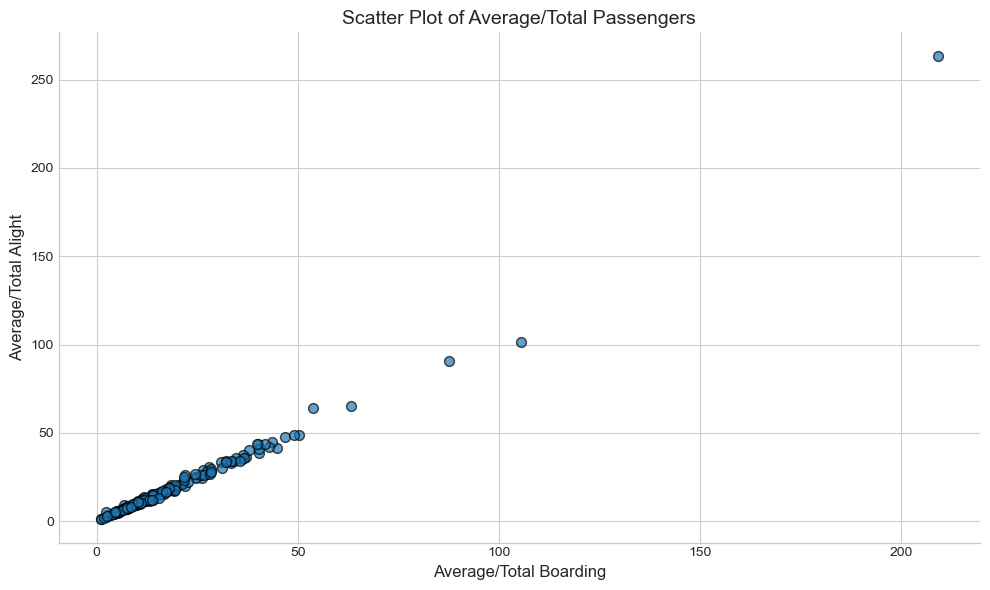

In [130]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('seaborn-whitegrid')

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(final_data['Average/승차총승객수'], final_data['Average/하차총승객수'], s=50, alpha=0.7, edgecolors='k')
ax.set_xlabel('Average/Total Boarding', fontsize=12)
ax.set_ylabel('Average/Total Alight', fontsize=12)
ax.set_title('Scatter Plot of Average/Total Passengers', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [131]:
# import matplotlib.pyplot as plt

# # 스타일 설정
# plt.style.use('seaborn-whitegrid')

# # 시각화
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(final_data['Average/승차총승객수'], final_data['Average/하차총승객수'], s=50, alpha=0.7, edgecolors='k')
# ax.set_xlabel('Average/승차총승객수', fontsize=12)
# ax.set_ylabel('Average/하차총승객수', fontsize=12)
# ax.set_title('Scatter Plot of Average/총_승객수', fontsize=14)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.tight_layout()
# plt.show()

In [132]:
# import matplotlib.pyplot as plt

# # 시각화
# plt.figure(figsize=(10, 6))
# final_data.boxplot(column=['Average/승차총승객수', 'Average/하차총승객수'])
# plt.xlabel('열', fontsize=12)
# plt.ylabel('Average/총_승객수', fontsize=12)
# plt.title('Boxplot of Average/총_승객수 by 열', fontsize=14)
# plt.show()

In [133]:
# import matplotlib.pyplot as plt

# # 데이터 프레임의 열 이름 변경
# final_data.rename(columns={'Average/승차총승객수': 'Average/Total_boarding_passengers', 
#                            'Average/하차총승객수': 'Average/Total_alighting_passengers'}, inplace=True)
# #
# # Visualization
# plt.figure(figsize=(10, 6))
# final_data.boxplot(column=['Average/Total_boarding_passengers', 'Average/Total_alighting_passengers'])
# plt.xlabel('Column', fontsize=12)
# plt.ylabel('Average/Total_Passengers', fontsize=12)
# plt.title('Boxplot of Average/Total_Passengers by Column', fontsize=14)
# plt.show()

In [134]:
final_data.to_csv("final_data.csv")

In [135]:
import pandas as pd

# 첫 번째 파일과 두 번째 파일을 읽어옵니다. (파일 경로는 실제 경로에 맞게 변경해주세요.)
file1 = pd.read_csv('final_data.csv', index_col=0)
file2 = pd.read_csv('혼잡도.csv', encoding='cp949', index_col=0)

# "호선" 열을 문자열로 변환합니다.
file2['호선'] = file2['호선'].astype(str)

merged_file = pd.merge(file1, file2[['출발역', '호선']].drop_duplicates(), how='inner', left_on='역', right_on='출발역')

# 불필요한 "역" 열을 삭제합니다.
merged_file.drop('출발역', axis=1, inplace=True)

print(file1.shape, file2.shape)
print(merged_file.shape)
merged_file.head()



(183, 3) (1658, 44)
(210, 4)


,Average/승차총승객수,Average/하차총승객수,역,호선
0,40.274570,38.388221,가락시장,3
1,40.274570,38.388221,가락시장,8
2,7.415375,7.066410,가산디지털단지,7
3,3.342722,3.319510,강남,2
4,19.250293,16.933689,강남구청,7


In [136]:
# 열 이름 변경
merged_file.rename(columns={'Average/승차총승객수': '평균 혼잡도/총 승차객', 'Average/하차총승객수': '평균 혼잡도/총 하차객'}, inplace=True)

stats1 = merged_file.groupby('호선')["평균 혼잡도/총 승차객"].agg(['mean', 'std'])
stats2 = merged_file.groupby('호선')["평균 혼잡도/총 하차객"].agg(['mean', 'std'])

In [137]:
merged_file

,평균 혼잡도/총 승차객,평균 혼잡도/총 하차객,역,호선
0,40.274570,38.388221,가락시장,3
1,40.274570,38.388221,가락시장,8
2,7.415375,7.066410,가산디지털단지,7
3,3.342722,3.319510,강남,2
4,19.250293,16.933689,강남구청,7
...,...,...,...,...
205,7.493500,7.342090,혜화,4
206,8.617346,8.083089,홍대입구,2
207,10.340571,10.988862,홍제,3
208,4.646072,5.050820,화곡,5


In [138]:
stats1

,mean,std
호선,,
1,20.481611,11.769515
2,17.981289,18.037086
3,21.395755,14.589510
4,27.304577,51.768136
5,19.334441,16.015648
6,26.175265,20.066318
7,14.398761,7.160127
8,16.901690,12.502837


In [165]:
import numpy as np
import scipy.stats as stats

# Convert the means and standard deviations to numpy arrays
means = np.array(stats1["mean"])
stds = np.array(stats1["std"])

n = 31

# Calculate the variance for each group
variances = np.array(stds)**2 / n

# Calculate the overall variance
overall_variance = np.mean(variances)

# Calculate the between-group variance
SSB = np.sum((means - overall_mean)**2)

# Calculate the within-group variance
SSW = np.sum(variances)

# Calculate the degrees of freedom for between-group and within-group
dfb = len(means) - 1
dfw = len(means) * (n - 1)

# Calculate the F statistic
F = (SSB / dfb) / (SSW / dfw)

# Calculate the p-value
p = 1 - stats.f.cdf(F, dfb, dfw)

F, p

(34.524857975724096, 1.1102230246251565e-16)

In [166]:
from statsmodels.stats.multicomp import MultiComparison

# Calculate the standard error for each group
standard_errors = np.array(stds) / np.sqrt(n)

# Create a DataFrame with the means and standard errors
df = pd.DataFrame({
    'mean': means,
    'se': standard_errors,
    'group': np.arange(1, len(means) + 1)
})

# Repeat each row n times to mimic the original data
df = df.loc[np.repeat(df.index.values, n)]

# Perform Tukey's HSD
mc = MultiComparison(df['mean'], df['group'])
result = mc.tukeyhsd()

print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2  -2.5003   0.0  -2.5003  -2.5003   True
     1      3   0.9141   0.0   0.9141   0.9141   True
     1      4    6.823   0.0    6.823    6.823   True
     1      5  -1.1472   0.0  -1.1472  -1.1472   True
     1      6   5.6937   0.0   5.6937   5.6937   True
     1      7  -6.0829   0.0  -6.0829  -6.0829   True
     1      8  -3.5799   0.0  -3.5799  -3.5799   True
     2      3   3.4145   0.0   3.4145   3.4145   True
     2      4   9.3233   0.0   9.3233   9.3233   True
     2      5   1.3532   0.0   1.3532   1.3532   True
     2      6    8.194   0.0    8.194    8.194   True
     2      7  -3.5825   0.0  -3.5825  -3.5825   True
     2      8  -1.0796   0.0  -1.0796  -1.0796   True
     3      4   5.9088   0.0   5.9088   5.9088   True
     3      5  -2.0613   0.0  -2.0613  -2.0613   True
     3      6   4.7795   0.0

In [139]:
import pandas as pd
import statsmodels.stats.weightstats as stests
from scipy.stats import norm


def check_significance(mean, std_dev, observed_value):
    z_score = (observed_value - mean) / std_dev
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    return p_value


df1 = pd.DataFrame(columns=['Line', 'Station', 'Mean', 'Std Dev', 'Observed Value', 'P-Value'])
df2 = pd.DataFrame(columns=['Line', 'Station', 'Mean', 'Std Dev', 'Observed Value', 'P-Value'])

df1[["Line" , "Station", "Observed Value"]] = merged_file[["호선", "역", "평균 혼잡도/총 승차객"]]
df2[["Line" , "Station", "Observed Value"]] = merged_file[["호선", "역", "평균 혼잡도/총 하차객"]]

# print(df1)
observed_value_dict1 = dict(zip(merged_file['역'], merged_file['평균 혼잡도/총 승차객']))
observed_value_dict2 = dict(zip(merged_file['역'], merged_file['평균 혼잡도/총 하차객']))

df1['Mean'] = df1['Line'].map(stats1['mean'])
df1['Std Dev'] = df1['Line'].map(stats1['std'])
df1['Observed Value'] = df1['Station'].map(observed_value_dict1)
df2['Mean'] = df2['Line'].map(stats2['mean'])
df2['Std Dev'] = df2['Line'].map(stats2['std'])
df2['Observed Value'] = df2['Station'].map(observed_value_dict2)
# p_list = []
# for a, b, c in df1[['Mean', 'Std Dev', "Observed Value"]]:
#     p = check_significance(a, b, c)
#     p_list.append(p)

p_list = []
for _, row in df1[['Mean', 'Std Dev', "Observed Value"]].iterrows():
    p = check_significance(row['Mean'], row['Std Dev'], row["Observed Value"])
    p_list.append(p)

# print(df1)
df1["P-Value"] = p_list


p_list = []
for _, row in df2[['Mean', 'Std Dev', "Observed Value"]].iterrows():
    p = check_significance(row['Mean'], row['Std Dev'], row["Observed Value"])
    p_list.append(p)

# print(df1)
df2["P-Value"] = p_list

In [140]:
df1["P-Value"]

0      0.195666
1      0.061566
2      0.329404
3      0.417032
4      0.498040
         ...   
205    0.701951
206    0.603657
207    0.448601
208    0.359077
209    0.770500
Name: P-Value, Length: 210, dtype: float64

In [141]:
df1[df1["P-Value"] <0.05]

,Line,Station,Mean,Std Dev,Observed Value,P-Value
32,4,남태령,27.304577,51.768136,209.249039,0.000440
45,2,도림천,17.981289,18.037086,105.506677,0.000001
73,3,무악재,21.395755,14.589510,50.296717,0.047598
77,7,반포,14.398761,7.160127,36.372498,0.002148
188,5,청구,19.334441,16.015648,87.696299,0.000020
189,6,청구,26.175265,20.066318,87.696299,0.002170
194,7,태릉입구,14.398761,7.160127,31.229783,0.018740


In [142]:
df1[df1["P-Value"] <0.05]["Station"].unique()

array(['남태령', '도림천', '무악재', '반포', '청구', '태릉입구'], dtype=object)

In [143]:
df2[df2["P-Value"] <0.05]

,Line,Station,Mean,Std Dev,Observed Value,P-Value
32,4,남태령,30.799041,65.569533,263.687190,0.000383
45,2,도림천,17.547317,17.372837,101.672265,0.000001
77,7,반포,14.632542,7.213887,37.569973,0.001475
188,5,청구,19.721413,16.436146,90.930694,0.000015
189,6,청구,26.687505,21.398125,90.930694,0.002680
194,7,태릉입구,14.632542,7.213887,30.061243,0.032456


In [144]:
df_merged = pd.merge(df1, df2, on=['Line', 'Station'], how='inner')

In [145]:
df_merged

,Line,Station,Mean_x,Std Dev_x,Observed Value_x,P-Value_x,Mean_y,Std Dev_y,Observed Value_y,P-Value_y
0,3,가락시장,21.395755,14.589510,40.274570,0.195666,21.509966,14.727679,38.388221,0.251786
1,8,가락시장,16.901690,12.502837,40.274570,0.061566,17.076388,12.440144,38.388221,0.086685
2,7,가산디지털단지,14.398761,7.160127,7.415375,0.329404,14.632542,7.213887,7.066410,0.294257
3,2,강남,17.981289,18.037086,3.342722,0.417032,17.547317,17.372837,3.319510,0.412804
4,7,강남구청,14.398761,7.160127,19.250293,0.498040,14.632542,7.213887,16.933689,0.749735
...,...,...,...,...,...,...,...,...,...,...
205,4,혜화,27.304577,51.768136,7.493500,0.701951,30.799041,65.569533,7.342090,0.720537
206,2,홍대입구,17.981289,18.037086,8.617346,0.603657,17.547317,17.372837,8.083089,0.585911
207,3,홍제,21.395755,14.589510,10.340571,0.448601,21.509966,14.727679,10.988862,0.474995
208,5,화곡,19.334441,16.015648,4.646072,0.359077,19.721413,16.436146,5.050820,0.372082


In [156]:
df = df_merged[["Line", "Station", "P-Value_x", "P-Value_y"]]


In [157]:
df.rename(columns={"P-Value_x": "P-value(Boarding)", "P-Value_y": "P-value(Alighting)"}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4972\3728846396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"P-Value_x": "P-value(Boarding)", "P-Value_y": "P-value(Alighting)"}, inplace=True)


In [160]:
df

,Unnamed: 0,Average/승차총승객수,Average/하차총승객수,역
0,0,40.274570,38.388221,가락시장
1,1,7.415375,7.066410,가산디지털단지
2,2,3.342722,3.319510,강남
3,3,19.250293,16.933689,강남구청
4,4,11.526362,12.080535,강동
...,...,...,...,...
178,178,7.493500,7.342090,혜화
179,179,8.617346,8.083089,홍대입구
180,180,10.340571,10.988862,홍제
181,181,4.646072,5.050820,화곡


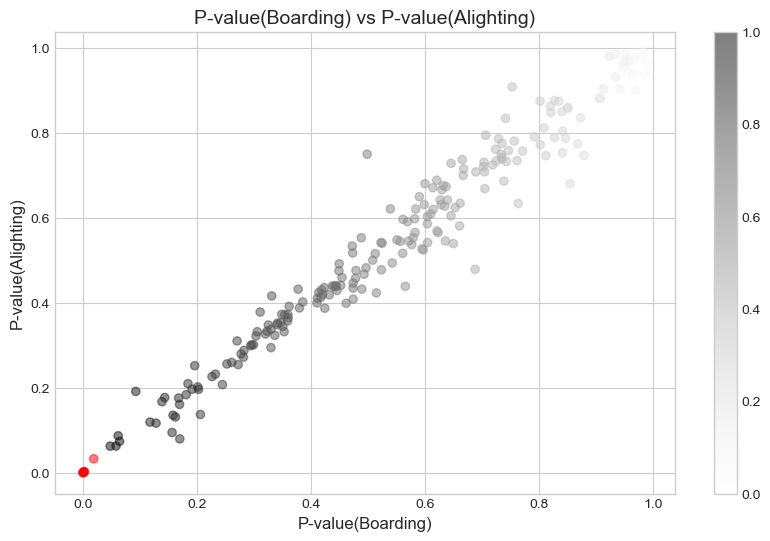

In [149]:
import matplotlib.pyplot as plt
import numpy as np

colors = np.where((df['P-value(Boarding)']<=0.05) & (df['P-value(Alighting)']<=0.05), 'red', df['P-value(Boarding)'])

plt.figure(figsize=(10, 6))
plt.scatter(df['P-value(Boarding)'], df['P-value(Alighting)'], c=colors, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.xlabel('P-value(Boarding)', fontsize=12)
plt.ylabel('P-value(Alighting)', fontsize=12)
plt.title('P-value(Boarding) vs P-value(Alighting)', fontsize=14)
plt.show()





C:\Users\user\AppData\Local\Temp\ipykernel_4972\2618076344.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


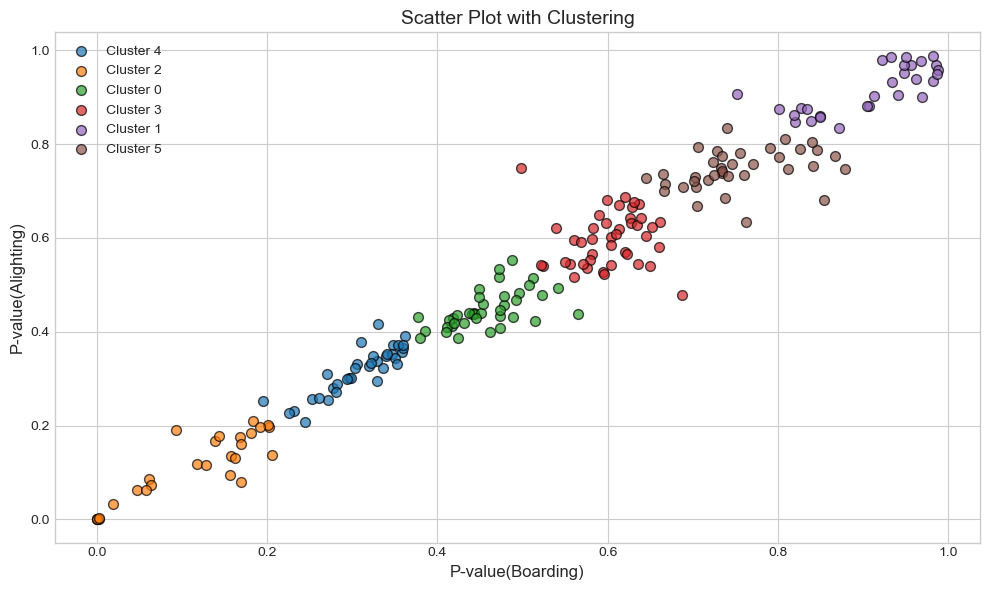

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = df[['P-value(Boarding)', 'P-value(Alighting)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
for cluster_id in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['P-value(Boarding)'], cluster_data['P-value(Alighting)'],
                s=50, alpha=0.7, edgecolors='k', label=f'Cluster {cluster_id}')
plt.xlabel('P-value(Boarding)', fontsize=12)
plt.ylabel('P-value(Alighting)', fontsize=12)
plt.title('Scatter Plot with Clustering', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4972\46574666.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


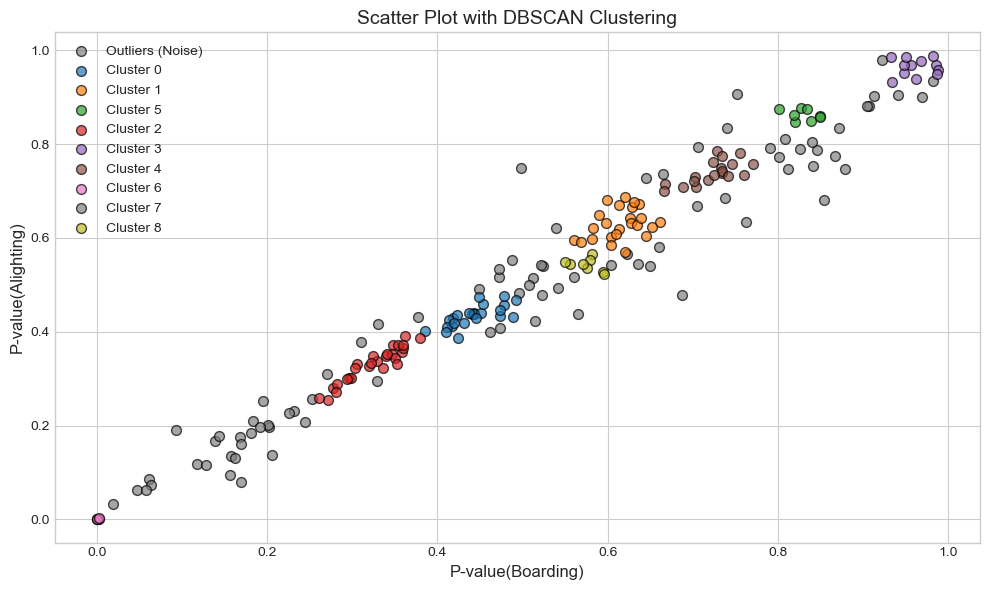

In [151]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = df[['P-value(Boarding)', 'P-value(Alighting)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  
clusters = dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
for cluster_id in df['Cluster'].unique():
    if cluster_id == -1:
        cluster_data = df[df['Cluster'] == cluster_id]
        plt.scatter(cluster_data['P-value(Boarding)'], cluster_data['P-value(Alighting)'],
                    s=50, alpha=0.7, edgecolors='k', color='gray', label='Outliers (Noise)')
    else:
        cluster_data = df[df['Cluster'] == cluster_id]
        plt.scatter(cluster_data['P-value(Boarding)'], cluster_data['P-value(Alighting)'],
                    s=50, alpha=0.7, edgecolors='k', label=f'Cluster {cluster_id}')

plt.xlabel('P-value(Boarding)', fontsize=12)
plt.ylabel('P-value(Alighting)', fontsize=12)
plt.title('Scatter Plot with DBSCAN Clustering', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()